In [15]:
# Install Requirements
# !sudo apt-get -qq install poppler-utils tesseract-ocr
# Upgrade Pillow to latest version
# %pip install -q --user --upgrade pillow
# Install Python Packages
%pip install -q unstructured["all-docs"]
# NOTE: you may also upgrade to the latest version with the command below,
#       though a more recent version of unstructured will not have been tested with this notebook
# %pip install -q --upgrade unstructured

ERROR: Exception:
Traceback (most recent call last):
  File "/home/samuel-yawson/Projects/all-academies-backend/venv/lib/python3.12/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/home/samuel-yawson/Projects/all-academies-backend/venv/lib/python3.12/site-packages/pip/_vendor/urllib3/response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "/home/samuel-yawson/Projects/all-academies-backend/venv/lib/python3.12/site-packages/pip/_vendor/urllib3/response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "/home/samuel-yawson/Projects/all-academies-backend/venv/lib/python3.12/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/http/client.py", line 479, in read
    s = sel

In [6]:
from langchain_community.document_loaders import PyPDFLoader
import pytesseract
from PIL import Image
from pdf2image import convert_from_path

loader = PyPDFLoader("WASSCE_Gen-Maths2_2011.pdf")
pages = loader.load_and_split()

# Convert PDF pages to images and perform OCR
text_pages = []
images = convert_from_path("WASSCE_Gen-Maths2_2011.pdf")
for image in images:
    text = pytesseract.image_to_string(image)
    text_pages.append(text)

In [25]:
type(image)

PIL.PpmImagePlugin.PpmImageFile

In [10]:
from pprint import pprint
pprint(text_pages)

['https://www.myschoolgist.com\n'
 '\n'
 'P4022 Nov.\n'
 'WASSCE 2011\n'
 'GENERAL\n'
 'MATHEMATICS/\n'
 'MATHEMATICS\n'
 '[CORE] 2\n'
 '\n'
 '24 hours\n'
 '\n'
 'THE WEST AFRICAN EXAMINATIONS COUNCIL\n'
 'West African Senior School Certificate Examination\n'
 '\n'
 'GENERAL MATHEMATICS/MATHEMATICS [CORE] 2\n'
 '\n'
 'November 2011 [100 marks] 24 hours\n'
 '\n'
 'Write your name and index number in the spaces provided at the top right-\n'
 'hand corner of this booklet.\n'
 '\n'
 'Answer ten questions in all; all the questions i: Part I and five questions '
 'from\n'
 'Part II.\n'
 '\n'
 'In each question, all necessary details of working, including rough work, '
 'must\n'
 'be shown with the answer.\n'
 '\n'
 'Give answers as accurately as data and tables allow.\n'
 '\n'
 'The following are provided for use in the examination:\n'
 '(a) graph paper,\n'
 '\n'
 '(b) drawing paper for construction work.\n'
 '\n'
 'The use of non-programmable, silent and cordless.calculator is allowed.\n'
 

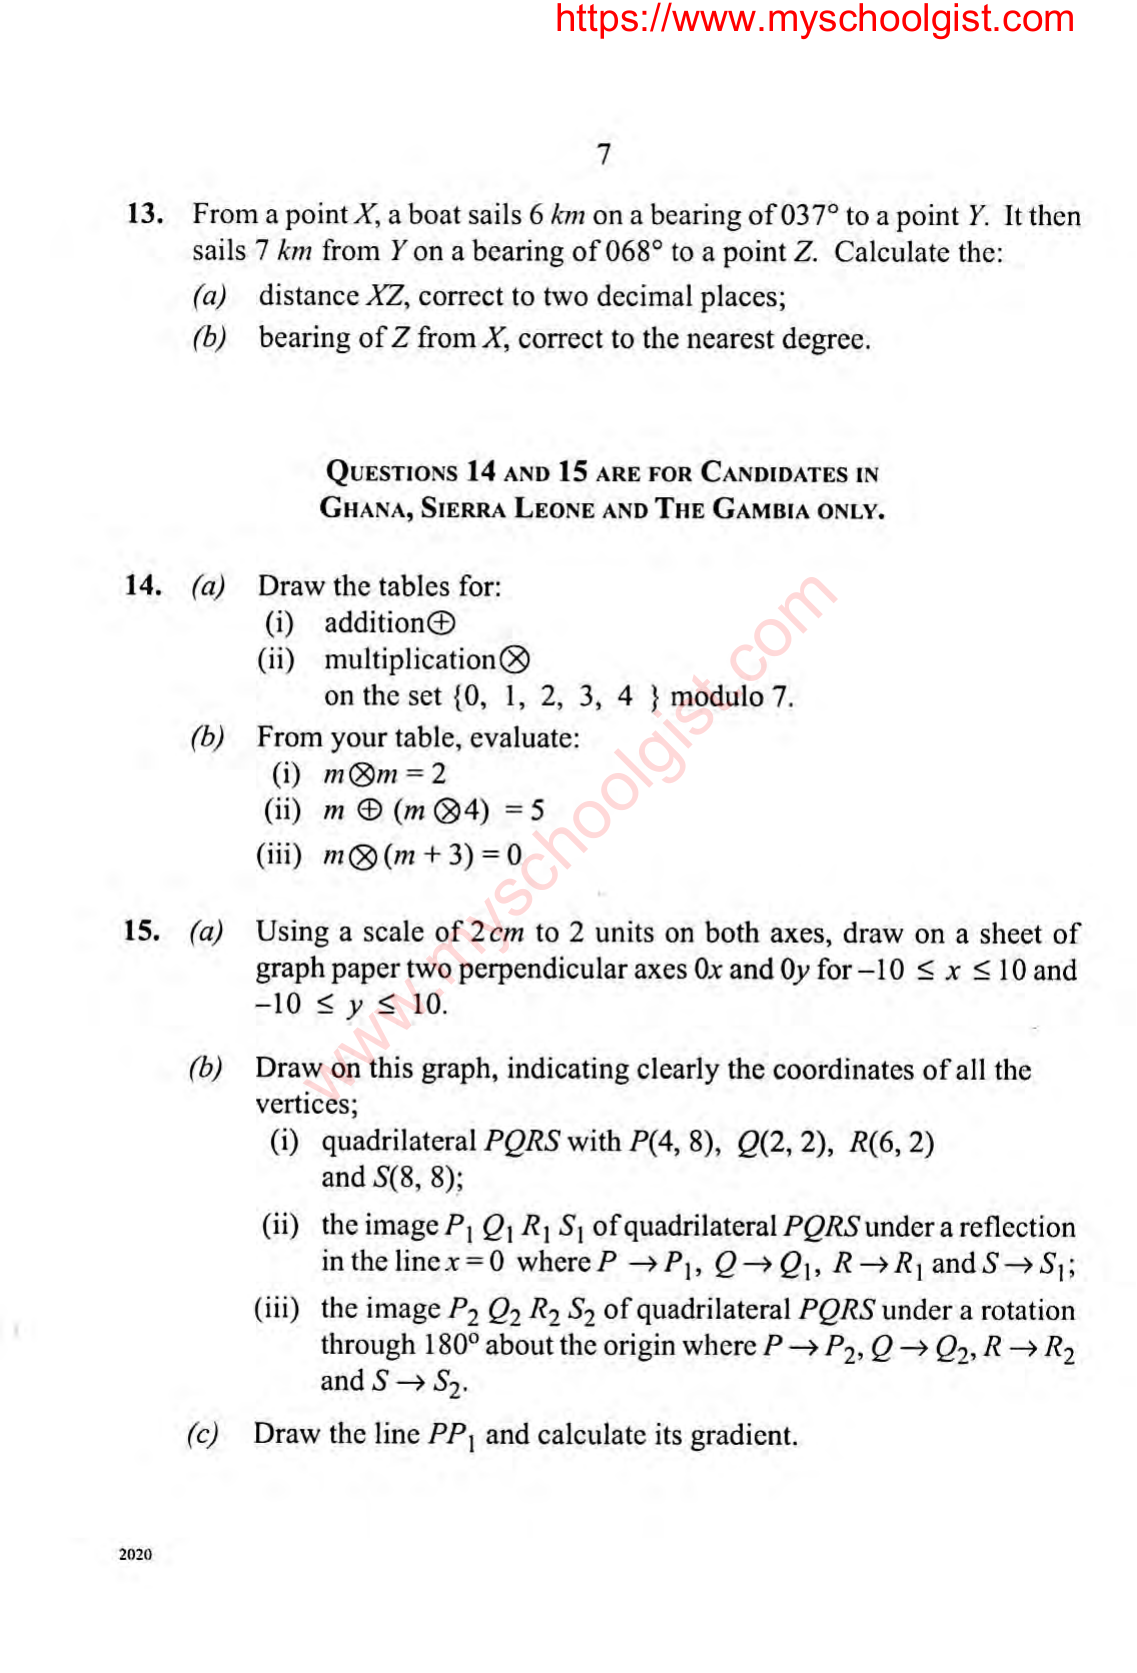

In [21]:
image

In [12]:
from langchain_groq import ChatGroq
import os
from dotenv import load_dotenv

load_dotenv()

model_name = 'llama-3.3-70b-versatile'

llm = ChatGroq(temperature=0, 
               model_name=model_name,
               api_key=os.getenv('GROQ_API_KEY'))

In [4]:
llm.invoke('Hi')

AIMessage(content="It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 36, 'total_tokens': 59, 'completion_time': 0.083636364, 'prompt_time': 0.008081122, 'queue_time': 0.608412029, 'total_time': 0.091717486}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_4e32347616', 'finish_reason': 'stop', 'logprobs': None}, id='run-2b8e2ac9-f2be-4d81-aa00-7c9baa97ee94-0', usage_metadata={'input_tokens': 36, 'output_tokens': 23, 'total_tokens': 59})

In [13]:
model_name = "llama-3.2-90b-vision-preview"

llm = ChatGroq(temperature=0, 
               model_name=model_name,
               api_key=os.getenv('GROQ_API_KEY'))

In [26]:
import base64
from io import BytesIO

# Function to encode images
def encode_image(image):
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

In [28]:
encoded_image = encode_image(image)

In [29]:
import base64
from io import BytesIO
from PIL import Image

# Function to decode base64 string to image
def decode_image(encoded_image):
    decoded = base64.b64decode(encoded_image)
    buffered = BytesIO(decoded)
    return Image.open(buffered)

# Decode the image
decoded_image = decode_image(encoded_image)
decoded_image.show()

In [56]:
from schemas.question import QuestionType
from typing import List

class GeneratedQuestionFormat:
    question: str
    allocated_marks: int

structured_llm = llm.with_structured_output(GeneratedQuestionFormat)

In [57]:
from langchain.schema.messages import HumanMessage, AIMessage
encoded_image = encode_image(image)

prompt = [
        AIMessage(content="You are a virtual assistant to a teacher who is transcribing exam qustions and digitizing them"),
        HumanMessage(content=[
            {"type": "text", "text": "State the questions on this page in Markdown. Format math expressions in latex using $$ to surround them. Let the next line character be in Markdown format"},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{encoded_image}"
                },
            },
        ])
    ]

In [58]:
response = structured_llm.invoke(prompt)

KeyboardInterrupt: 

In [50]:
pprint(response.content)

('Here are the questions on this page in Markdown format, with math '
 'expressions in LaTeX using $$ to surround them:\n'
 '\n'
 '### Question 13\n'
 '\n'
 'From a point X, a boat sails 6 km on a bearing of 037° to a point Y. It then '
 'sails 7 km from Y on a bearing of 068° to a point Z. Calculate the:\n'
 '\n'
 '* distance XZ, correct to two decimal places;\n'
 '* bearing of Z from X, correct to the nearest degree.\n'
 '\n'
 '### Question 14\n'
 '\n'
 'Draw the tables for:\n'
 '\n'
 '* addition\n'
 '* multiplication\n'
 '* on the set {0, 1, 2, 3, 4} modulo 7.\n'
 '\n'
 'From your table, evaluate:\n'
 '\n'
 '* $$m\\otimes m = 2$$\n'
 '* $$m\\oplus (m\\otimes 4) = 5$$\n'
 '* $$m\\otimes (m + 3) = 0$$\n'
 '\n'
 '### Question 15\n'
 '\n'
 'Using a scale of 2 cm to 2 units on both axes, draw on a sheet of graph '
 'paper two perpendicular axes 0x and 0y for -10 ≤ x ≤ 10 and -10 ≤ y ≤ 10.\n'
 '\n'
 'Draw on this graph, indicating clearly the coordinates of all the vertices:\n'
 '\n'
 '* 

Here are the questions on this page in Markdown format, with math expressions in LaTeX using 

 to surround them:
 
 ### Question 13
 From a point X, a boat sails 6 km on a bearing of 037° to a point Y. It then sails 7 km from Y on a bearing of 068° to a point Z. Calculate the:\n\n* distance XZ, correct to two decimal places;\n* bearing of Z from X, correct to the nearest degree.
 
 ### Question 14
 Draw the tables for:
 * addition
 * multiplication
 * on the set {0, 1, 2, 3, 4} modulo 7.
 
 From your table, evaluate:
 
 * $$m\otimes m = 2$$
 
 * $$m\oplus (m\times 4) = 5$$
 
 \n* $$m\\otimes (m + 3) = 0$$\n\n### Question 15\n\nUsing a scale of 2 cm to 2 units on both axes, draw on a sheet of graph paper two perpendicular axes 0x and 0y for -10 ≤ x ≤ 10 and -10 ≤ y ≤ 10.\n\nDraw on this graph, indicating clearly the coordinates of all the vertices:\n\n* quadrilateral PQRS with P(4, 8), Q(2, 2), R(6, 2) and S(8, 8);\n* the image P\'Q\'R\'S\' of quadrilateral PQRS under a reflection in the line x = 0 where P → P\', Q → Q\', R → R\', and S → S\';\n* the image P"Q"R"S" of quadrilateral P\'Q\'R\'S\' under a rotation through 180° about the origin where P → P", Q → Q", R → R", and S → S".\n\nDraw the line PP\' and calculate its gradient.


Here are the questions on this page in Markdown format, with math expressions in LaTeX using $$ to surround them:\n\n### Question 13\n\nFrom a point X, a boat sails 6 km on a bearing of 037° to a point Y. It then sails 7 km from Y on a bearing of 068° to a point Z. Calculate the:\n\n* distance XZ, correct to two decimal places;\n* bearing of Z from X, correct to the nearest degree.\n\n### Question 14\n\nDraw the tables for:\n\n* addition\n* multiplication\n* on the set {0, 1, 2, 3, 4} modulo 7.\n\nFrom your table, evaluate:\n\n* $$m\\otimes m = 2$$\n* $$m\\oplus (m\\otimes 4) = 5$$\n* $$m\\otimes (m + 3) = 0$$\n\n### Question 15\n\nUsing a scale of 2 cm to 2 units on both axes, draw on a sheet of graph paper two perpendicular axes 0x and 0y for -10 ≤ x ≤ 10 and -10 ≤ y ≤ 10.\n\nDraw on this graph, indicating clearly the coordinates of all the vertices:\n\n* quadrilateral PQRS with P(4, 8), Q(2, 2), R(6, 2) and S(8, 8);\n* the image P\'Q\'R\'S\' of quadrilateral PQRS under a reflection in the line x = 0 where P → P\', Q → Q\', R → R\', and S → S\';\n* the image P"Q"R"S" of quadrilateral P\'Q\'R\'S\' under a rotation through 180° about the origin where P → P", Q → Q", R → R", and S → S".\n\nDraw the line PP\' and calculate its gradient.


### Importing Assessment

In [7]:
file_path = '/home/samuel-yawson/Documents/sat-practice-test-4-digital.pdf'

In [6]:
from unstructured.partition.auto import partition
elements = partition(filename=file_path)

ImportError: partition_pdf() is not available because one or more dependencies are not installed. Use: pip install "unstructured[pdf]" (including quotes) to install the required dependencies